In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # Loading data
# file_path = Path("Cleaned_Data/2008-2020_tornadoes_EF_cleaned.csv")
# tornado_df = pd.read_csv(file_path)
# tornado_df

In [3]:
# Apache Spark Set Up

import os
# Find the latest version of spark 3.0 from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.3.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [912 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [4]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Tornadoes").getOrCreate()

In [5]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url ="https://group-2-project-tornadoes.s3.amazonaws.com/2008-2020_tornadoes_EF_cleaned_db.csv"
spark.sparkContext.addFile(url)
tornado = spark.read.csv(SparkFiles.get("2008-2020_tornadoes_EF_cleaned_db.csv"), sep=",", header=True)

# Show DataFrame
tornado.show()

+-------+---------+----+-----+---+----------------+-------+---------+---------+---------+-------+-------+---+--------+----------+-------+---------+------+-----+
|Torn_ID|County_ID|Year|Month|Day|       Timestamp|ST_FIPS|CNTY_FIPS|Start_Lat|Start_Lon|End_Lat|End_Lon| EF|Injuries|Fatalities|   Loss|Crop_Loss|Length|Width|
+-------+---------+----+-----+---+----------------+-------+---------+---------+---------+-------+-------+---+--------+----------+-------+---------+------+-----+
|      1|    35049|2008|   10| 11|10/11/2008 18:33|     35|       49|    35.15|  -105.94|      0|      0|  0|       0|         0|  12000|     null|  0.02|   10|
|      2|    20181|2008|   10| 11|10/11/2008 21:54|     20|      181|    39.33|  -101.55|      0|      0|  0|       0|         0|   null|     null|  0.25|   10|
|      3|    13039|2008|   10| 24|10/24/2008 16:55|     13|       39|    31.02|   -81.81|      0|      0|  0|       0|         0|   1000|     null|  0.25|   25|
|      4|     5113|2008|   10|  6|

In [6]:
# Convert spark object to pandas dataframe
tornado_df = tornado.toPandas()
tornado_df

,Torn_ID,County_ID,Year,Month,Day,Timestamp,ST_FIPS,CNTY_FIPS,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,1,35049,2008,10,11,10/11/2008 18:33,35,49,35.15,-105.94,0,0,0,0,0,12000,None,0.02,10
1,2,20181,2008,10,11,10/11/2008 21:54,20,181,39.33,-101.55,0,0,0,0,0,None,None,0.25,10
2,3,13039,2008,10,24,10/24/2008 16:55,13,39,31.02,-81.81,0,0,0,0,0,1000,None,0.25,25
3,4,5113,2008,10,6,10/6/2008 13:46,5,113,34.58,-94.15,34.63,-94.12,1,0,0,75000,None,3.41,250
4,5,48067,2008,10,6,10/6/2008 16:05,48,67,33.07,-94.1,33.09,-94.08,0,0,0,75000,None,1.5,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,15887,47095,2020,9,1,9/1/2020 16:24,47,95,36.329,-89.4981,36.3517,-89.4729,0,0,0,None,2000,2.1,50
15887,15888,24003,2020,9,3,9/3/2020 15:57,24,3,38.948,-76.5695,38.9233,-76.4615,0,0,0,1250000,None,6.05,100
15888,15889,6039,2020,9,5,9/5/2020 16:17,6,39,37.35,-119.34,37.5218,-119.3056,2,0,0,None,None,12.02,50
15889,15890,6019,2020,9,5,9/5/2020 18:29,6,19,37.25,-119.2,37.2598,-119.1838,1,0,0,None,None,1.12,25


In [7]:
# Check data types
tornado_df.dtypes

Torn_ID       object
County_ID     object
Year          object
Month         object
Day           object
Timestamp     object
ST_FIPS       object
CNTY_FIPS     object
Start_Lat     object
Start_Lon     object
End_Lat       object
End_Lon       object
EF            object
Injuries      object
Fatalities    object
Loss          object
Crop_Loss     object
Length        object
Width         object
dtype: object

In [8]:
# Convert timestamp to datetime
tornado_df['Timestamp']= pd.to_datetime(tornado_df['Timestamp'])

# Convert all strings to numeric
cols=[i for i in tornado_df.columns if i not in ["Timestamp"]]
for col in cols:
    tornado_df[col]=pd.to_numeric(tornado_df[col])

# check dtypes
tornado_df.dtypes

Torn_ID                int64
County_ID              int64
Year                   int64
Month                  int64
Day                    int64
Timestamp     datetime64[ns]
ST_FIPS                int64
CNTY_FIPS              int64
Start_Lat            float64
Start_Lon            float64
End_Lat              float64
End_Lon              float64
EF                     int64
Injuries               int64
Fatalities             int64
Loss                 float64
Crop_Loss            float64
Length               float64
Width                  int64
dtype: object

In [9]:
tornado_df.columns

Index(['Torn_ID', 'County_ID', 'Year', 'Month', 'Day', 'Timestamp', 'ST_FIPS',
       'CNTY_FIPS', 'Start_Lat', 'Start_Lon', 'End_Lat', 'End_Lon', 'EF',
       'Injuries', 'Fatalities', 'Loss', 'Crop_Loss', 'Length', 'Width'],
      dtype='object')

In [10]:
# drop na columns
tornado_df = tornado_df.dropna()

## Machine Learning

In [11]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Random Forest -- feature importance

This algorithm takes inputs (Injuries	Fatalities	Loss	Crop_Loss	Length	Width) to predict (EF)

#### 1. Define input data (X) and output data (y)

In [12]:
X = tornado_df.copy()
X = X.drop(['Torn_ID','County_ID','Year', 'Month', 'Day', 'Timestamp','ST_FIPS','CNTY_FIPS','Start_Lat','Start_Lon','End_Lat', 'End_Lon','EF'], axis=1)
X

,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
22,0,0,510000.0,25000.0,8.13,200
28,2,1,500000.0,200000.0,4.09,150
29,4,1,1000000.0,200000.0,8.19,100
73,0,0,350000.0,500000.0,10.59,500
81,0,0,20000.0,60000.0,3.14,250
...,...,...,...,...,...,...
15764,0,0,20000.0,5000.0,1.26,50
15785,1,0,35000.0,20000.0,0.26,50
15786,0,0,45000.0,30000.0,2.17,100
15838,0,0,150000.0,100000.0,2.58,100


In [13]:
y = tornado_df["EF"].ravel()
y[:10]

array([1, 2, 3, 1, 1, 3, 3, 1, 1, 1])

#### 2. Splitting into Train and Test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3. Scale the input data (X)

In [15]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### 4. Fitting the Random Forest Model

In [16]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
 # Fitting the model
model = rf_model.fit(X_train_scaled, y_train)

#### 5. Making Predictions Using Random Forest Model

In [18]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 3,
       1, 0, 1, 1, 3, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 2, 1, 4, 2, 0, 1, 1,
       2, 1, 0, 2, 1, 3, 1, 1, 2, 1, 1, 0, 3, 1, 1, 2, 1, 1, 0, 1, 3, 1,
       2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 3, 1, 0, 1, 1, 0, 1, 2,
       3, 1, 1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 0, 3, 1, 0, 2, 1, 0, 3, 0, 0,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0,
       1, 2, 1, 2, 1, 3])

#### 6. Model Evaluation

In [20]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3","Actual 4","Actual 5"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3","Predicted 4","Predicted 5"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [21]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 0,24,16,1,0,0,0
Actual 1,9,55,6,1,0,0
Actual 2,0,13,16,2,0,0
Actual 3,0,2,3,9,0,0
Actual 4,0,0,0,1,1,0
Actual 5,0,0,0,1,0,0


Accuracy Score : 0.65625
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        41
           1       0.64      0.77      0.70        71
           2       0.62      0.52      0.56        31
           3       0.64      0.64      0.64        14
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.66       160
   macro avg       0.60      0.50      0.54       160
weighted avg       0.66      0.66      0.65       160



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 7. Rank the Importance of Features

In [22]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

In [23]:
# We can sort the features by their importance.
feature_sort = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
feature_sort

[(0.2812634399898659, 'Loss'),
 (0.23449082250095762, 'Length'),
 (0.2300644629188057, 'Width'),
 (0.17380380642101648, 'Crop_Loss'),
 (0.06266528971624191, 'Injuries'),
 (0.01771217845311234, 'Fatalities')]

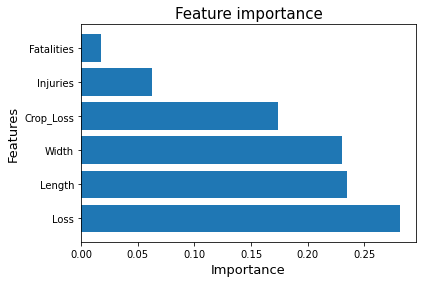

In [24]:
# Plot Feature Importance
features_sorted = []
importance_sorted = []

for i in feature_sort:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)
plt.ylabel("Features", fontsize=13)

plt.barh(range(len(importance_sorted)), importance_sorted,)
plt.yticks(range(len(importance_sorted)), features_sorted);